In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('C:\\Users\\aagam\\Desktop\\87f33b42-e-Dataset-3\\Dataset-3\\competition_third_train.csv')
test = pd.read_csv('C:\\Users\\aagam\\Desktop\\87f33b42-e-Dataset-3\\Dataset-3\\compet_third_test.csv')

In [5]:
print 'Data Dimensions: ',train.shape
print 'Number of Null values in columns: ', train[train.columns].isnull().sum()

Data Dimensions:  (780829, 18)
Number of Null values in columns:  ID              0
a               0
b               0
c            2006
d          248300
e          248300
f               0
g          392703
h          392703
i          392703
j               0
k               0
predict         0
l               0
m               0
n               0
o               0
p               0
dtype: int64


In [6]:
print 'Data Dimensions: ',test.shape
print 'Number of Null values in columns: ', test[test.columns].isnull().sum()

Data Dimensions:  (100000, 17)
Number of Null values in columns:  ID        0
a         0
b         0
c       212
d     32860
e     32860
f         0
g     49332
h     49332
i     49332
j         0
k         0
l         0
m         0
n         0
o         0
p         0
dtype: int64


In [7]:
train.dtypes

ID           int64
a           object
b           object
c          float64
d          float64
e          float64
f            int64
g          float64
h          float64
i           object
j            int64
k           object
predict      int64
l            int64
m            int64
n            int64
o           object
p            int64
dtype: object

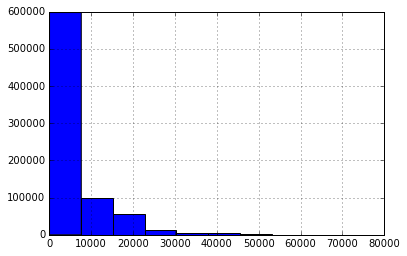

In [8]:
train['c'].hist()

### Imputing Missing Values

In [9]:
train['c'].fillna(train['c'].median(),inplace=True)
test['c'].fillna(test['c'].median(),inplace=True)

### Transforming object type variable into integer form

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['o'] = le.fit_transform(train['o'])

In [11]:
train['a'] = le.fit_transform(train['a'])
train['b'] = le.fit_transform(train['b'])

In [12]:
train.dtypes

ID           int64
a            int64
b            int64
c          float64
d          float64
e          float64
f            int64
g          float64
h          float64
i           object
j            int64
k           object
predict      int64
l            int64
m            int64
n            int64
o            int64
p            int64
dtype: object

In [14]:
test['o'] = le.fit_transform(test['o'])
test['a'] = le.fit_transform(test['a'])
test['b'] = le.fit_transform(test['b'])

### Need to import library xgboost

In [15]:
dir = r'C:\Program Files\mingw-w64\x86_64-6.2.0-posix-seh-rt_v5-rev1\mingw64\bin'
import os
os.environ['PATH'].count(dir) # Here I show its already in the path at least once
os.environ['PATH'].find(dir)
os.environ['PATH'] = dir + ';' + os.environ['PATH'] # I put it on the beginning of the path, NOT THE END.

In [16]:
predictor_var = ['a','b','c','f','j','l','m','n','o','p']
outcome_var = ['predict']

In [19]:
train['c'] = train['c'].astype(int64)

In [20]:
%%time
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.cross_validation import cross_val_score


model = XGBRegressor()
results = cross_val_score(model, train[predictor_var], train[outcome_var], cv=5)
print("Accuracy: %.2f%% Std.Dev. (%.2f%%)" % (results.mean()*100, results.std()*100))
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    results.min(), results.mean(), results.max()))

Accuracy: 92.19% Std.Dev. (0.52%)
min: 0.918, mean: 0.922, max: 0.932
Wall time: 1min 6s


In [30]:
model.fit(train[predictor_var],train[outcome_var])
predictions = model.predict(test[predictor_var])

In [35]:
predictions[predictions < 0 ].sum()

-818068.19

In [36]:
predictions[predictions < 0] = 0

In [ ]:
file_submit=pd.DataFrame()
file_submit['Id']=test['ID']
file_submit['Prediction']=predictions
print file_submit.head()
file_submit.to_csv("C:\\Users\\aagam\\Desktop\\timeseries_xgboost1.csv")

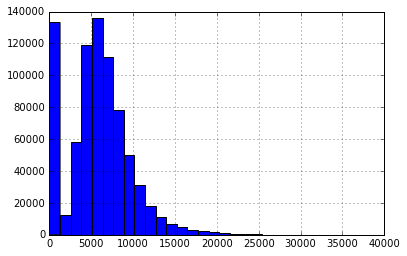

In [23]:
train['predict'].hist(bins=30)

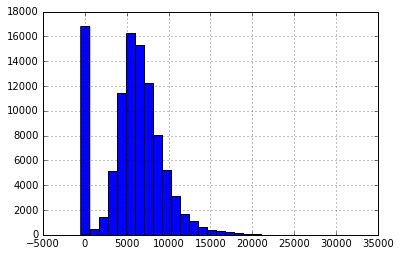

In [25]:
file_submit['Prediction'].hist(bins=30)